                 0         1         2        RMS
0        10.053986 -6.020577 -0.455587  11.727640
1        11.001018 -6.474343 -0.474938  12.773609
2        10.160388 -5.891117 -0.457303  11.753633
3        10.207096 -5.824201 -0.458092  11.760782
4        10.254012 -5.755736 -0.458883  11.767916
...            ...       ...       ...        ...
4155878  10.170602 -5.783949 -0.493787  11.710637
4155879  10.161697 -5.871595 -0.492505  11.746415
4155880  10.134977 -5.949937 -0.490785  11.762669
4155881  10.065044 -6.000479 -0.488056  11.728131
4155882  10.017201 -6.066320 -0.485814  11.720946

[4155883 rows x 4 columns]


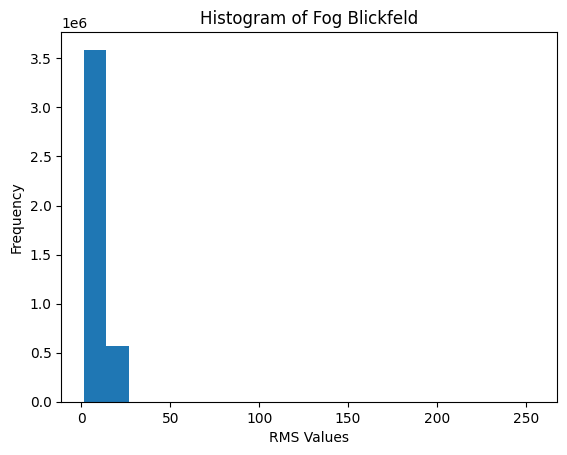

                0          1         2        RMS
0        0.415075  -1.385477 -0.400629   1.500779
1        0.737259  -1.279485 -0.149258   1.484221
2        0.823465  -1.230332 -0.128906   1.486078
3        0.862532  -1.204537 -0.094234   1.484503
4        0.898684  -1.179686 -0.083691   1.485361
...           ...        ...       ...        ...
189637  31.167093   4.047004 -2.720214  31.546243
189638  31.138898   4.531852 -2.222571  31.545340
189639  31.363296   3.951107  3.694858  31.826397
189640  30.427610   4.552252 -8.378582  31.886723
189641  29.497308  11.984101 -1.555241  31.876773

[189642 rows x 4 columns]


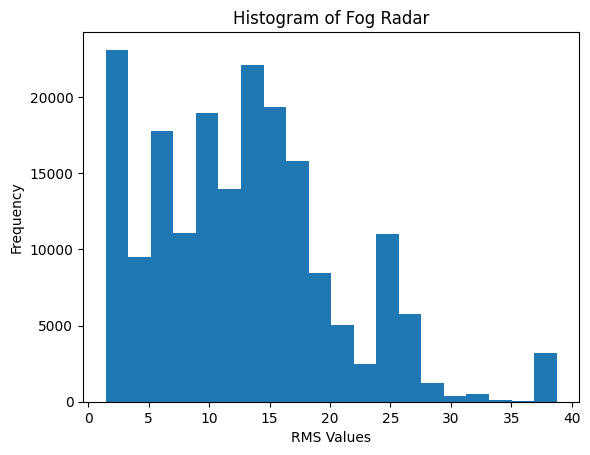

                 0         1         2    RMS
0         0.528958 -1.519814 -0.431193  1.666
1         0.536091 -1.541175  0.028482  1.632
2         0.534966 -1.538808 -0.376118  1.672
3         0.537522 -1.547030  0.085831  1.640
4         0.534170 -1.537382 -0.316361  1.658
...            ...       ...       ...    ...
11625971 -1.011042 -0.008294  0.196533  1.030
11625972 -1.014575 -0.008146 -0.053173  1.016
11625973 -1.026955 -0.008066  0.237098  1.054
11625974 -1.027813 -0.007893 -0.017941  1.028
11625975 -1.004535 -0.007539  0.269172  1.040

[11625976 rows x 4 columns]


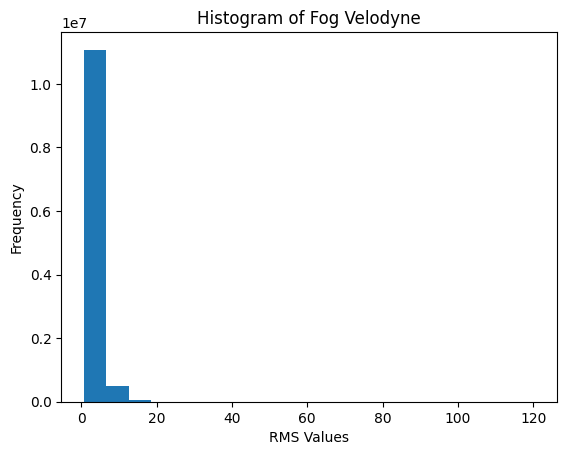

                 0         1         2        RMS
0        10.040359 -6.012930 -0.455315  11.712022
1        10.138677 -5.976094 -0.457115  11.777751
2        10.180566 -5.903039 -0.457753  11.777068
3        10.193380 -5.816719 -0.457811  11.745161
4        10.240379 -5.748109 -0.458573  11.752294
...            ...       ...       ...        ...
4720465  10.197757 -5.799403 -0.494370  11.741879
4720466  10.137710 -5.858479 -0.491877  11.719082
4720467  10.097526 -5.928886 -0.489864  11.719714
4720468  10.044592 -5.989034 -0.487557  11.704703
4720469   9.996938 -6.054551 -0.485298  11.697515

[4720470 rows x 4 columns]


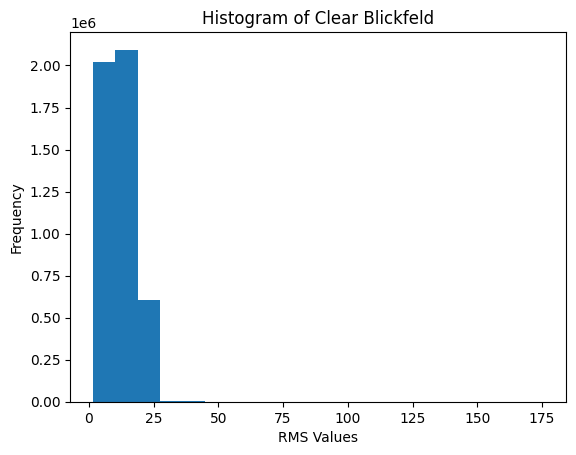

                0          1         2        RMS
0        1.686587  -8.096316 -1.129302   8.346870
1        7.303916  -4.058640  0.525907   8.372354
2        7.334102  -3.933698 -1.177857   8.405378
3        7.453958  -3.805163  0.390086   8.378122
4        7.577099  -3.539627  0.517931   8.379120
...           ...        ...       ...        ...
197575  35.857757 -13.592028 -0.111497  38.347547
197576  37.105644   8.480007 -5.280463  38.426848
197577  37.301335   8.983968  1.581239  38.400542
197578  35.994004  13.078623  2.893839  38.405638
197579  35.323705  13.795655 -6.316175  38.444483

[197580 rows x 4 columns]


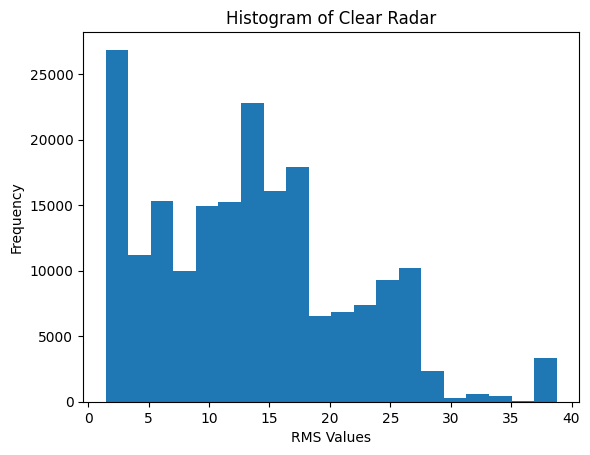

                  0          1         2        RMS
0          0.400702   2.428341 -0.659471   2.548000
1          0.600659   3.636161  0.064330   3.686000
2          0.470875   2.847413 -0.666305   2.962000
3          0.674591   4.074871  0.216462   4.136000
4          0.551519   3.331454 -0.656383   3.440000
...             ...        ...       ...        ...
14069061   6.468504  -3.310101 -0.635714   7.294000
14069062  21.037237 -10.765297  4.593536  24.074001
14069063  10.519402  -5.385366 -0.619344  11.834000
14069064  11.877566  -6.085907 -0.232955  13.348001
14069065  21.045765 -10.788209  6.336926  24.484001

[14069066 rows x 4 columns]


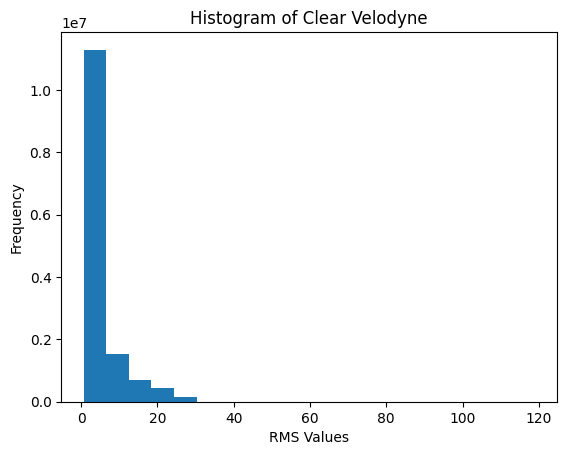

In [1]:
import os
import csv
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate RMS values and add a new column to the DataFrame
def calculate_rms(df, title):
    df_copy = pd.DataFrame(df)
    rms_values = np.sqrt(np.sum(df_copy**2, axis=1))
    df_copy['RMS'] = rms_values

    # Display the DataFrame with the new RMS column
    print(df_copy)

    # Plot histogram
    plt.hist(df_copy['RMS'], bins=20)
    plt.title(f'Histogram of {title}')
    plt.xlabel('RMS Values')
    plt.ylabel('Frequency')
    plt.show()

# Function to merge CSV files and perform calculations for a given scenario
def process_scenario(dir_bf, dir_radar, dir_velodyne, avg_dir_bf, avg_dir_radar, avg_dir_velodyne, title):
    # Merge CSV files for Blickfeld
    csv_file_list_bf = glob.glob(os.path.join(dir_bf, '*.csv'))
    with open(avg_dir_bf, 'w', newline='') as f:
        wf = csv.writer(f, lineterminator='\n')
        for files in csv_file_list_bf:
            with open(files, 'r') as r:
                rr = csv.reader(r)
                for row in rr:
                    wf.writerow(row)

    # Merge CSV files for Radar
    csv_file_list_radar = glob.glob(os.path.join(dir_radar, '*.csv'))
    with open(avg_dir_radar, 'w', newline='') as f:
        wf = csv.writer(f, lineterminator='\n')
        for files in csv_file_list_radar:
            with open(files, 'r') as r:
                rr = csv.reader(r)
                for row in rr:
                    wf.writerow(row)

    # Merge CSV files for Velodyne
    csv_file_list_velodyne = glob.glob(os.path.join(dir_velodyne, '*.csv'))
    with open(avg_dir_velodyne, 'w', newline='') as f:
        wf = csv.writer(f, lineterminator='\n')
        for files in csv_file_list_velodyne:
            with open(files, 'r') as r:
                rr = csv.reader(r)
                for row in rr:
                    wf.writerow(row)

    # Read the merged CSV files into DataFrames with header=None
    df_bf = pd.read_csv(avg_dir_bf, sep=' ', delimiter=None, header=None)
    df_radar = pd.read_csv(avg_dir_radar, sep=' ', delimiter=None, header=None)
    df_velodyne = pd.read_csv(avg_dir_velodyne, sep=' ', delimiter=None, header=None)

    # Drop unnecessary columns
    df_bf.drop(df_bf.columns[-2:], axis=1, inplace=True)
    df_radar.drop(df_radar.columns[-2:], axis=1, inplace=True)
    df_velodyne.drop(df_velodyne.columns[-3:], axis=1, inplace=True)

    # Calculate RMS and plot histograms
    calculate_rms(df_bf, f'{title} Blickfeld')
    calculate_rms(df_radar, f'{title} Radar')
    calculate_rms(df_velodyne, f'{title} Velodyne')

# Directory paths for "fog" scenario
dir_bf_fog = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_fog_anon\blickfeld"
dir_radar_fog = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_fog_anon\radar"
dir_velodyne_fog = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_fog_anon\velodyne"

# Output paths for "fog" scenario
avg_dir_bf_fog = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_fog_anon\Output_bf_fog.csv"
avg_dir_radar_fog = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_fog_anon\Output_radar_fog.csv"
avg_dir_velodyne_fog = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_fog_anon\Output_velodyne_fog.csv"

# Process "fog" scenario
process_scenario(dir_bf_fog, dir_radar_fog, dir_velodyne_fog, avg_dir_bf_fog, avg_dir_radar_fog, avg_dir_velodyne_fog, 'Fog')

# Directory paths for "clear" scenario
dir_bf_clear = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_clear_anon\blickfeld"
dir_radar_clear = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_clear_anon\radar"
dir_velodyne_clear = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_clear_anon\velodyne"

# Output paths for "clear" scenario
avg_dir_bf_clear = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_clear_anon\Output_bf_clear.csv"
avg_dir_radar_clear = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_clear_anon\Output_radar_clear.csv"
avg_dir_velodyne_clear = r"C:\Users\jdhru\OneDrive\Desktop\MECHATRONICS\lidar radar\CBuilding\csv\c_building_pedestrian_clear_anon\Output_velodyne_clear.csv"

# Process "clear" scenario
process_scenario(dir_bf_clear, dir_radar_clear, dir_velodyne_clear, avg_dir_bf_clear, avg_dir_radar_clear, avg_dir_velodyne_clear, 'Clear')
